# Problem Statement
Develop a classification model for the Iris dataset, aiming to accurately categorize iris flowers into setosa, versicolor, and virginica species based on sepal and petal measurements. The challenge involves exploring machine learning algorithms, optimizing model performance, and contributing to the understanding of effective classification methods for botanical datasets. The goal is to achieve high accuracy in species prediction, showcasing the applicability of machine learning in plant classification and providing insights into distinguishing features among iris species.

# Iris dataset Task

### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
df = pd.read_csv("iris.csv",index_col=False)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#state about data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#to display no of samples on each class
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Preprocessing the dataset

In [6]:
#ckeching for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Exploratory Data Analysis

<Axes: >

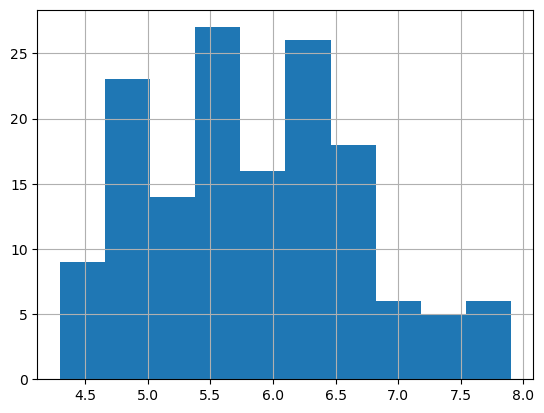

In [7]:
df['sepal_length'].hist()

<Axes: >

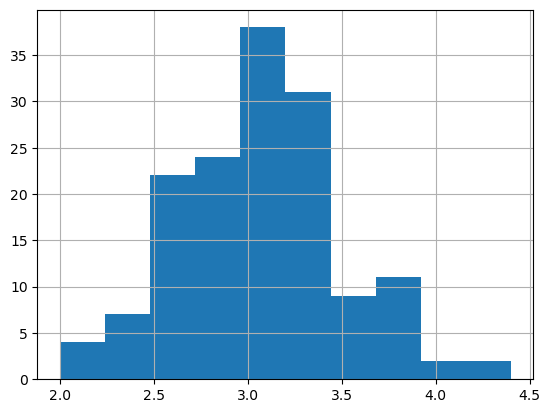

In [8]:
df['sepal_width'].hist()

<Axes: >

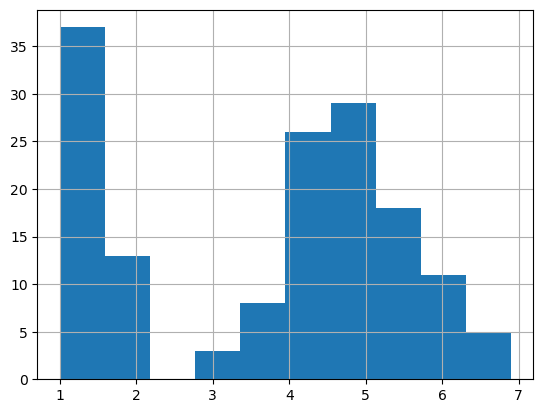

In [9]:
 df['petal_length'].hist()

<Axes: >

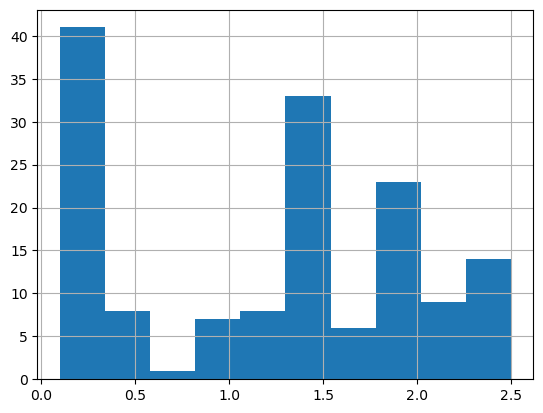

In [10]:
df['petal_width'].hist()

In [11]:
#scatterplot
colors=['red','orange','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

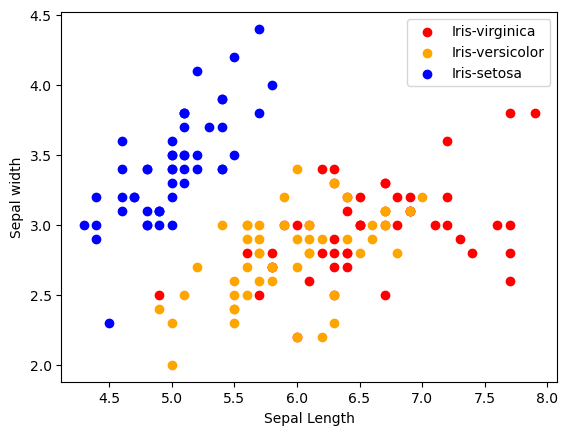

In [12]:
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c = colors[i],label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.legend()

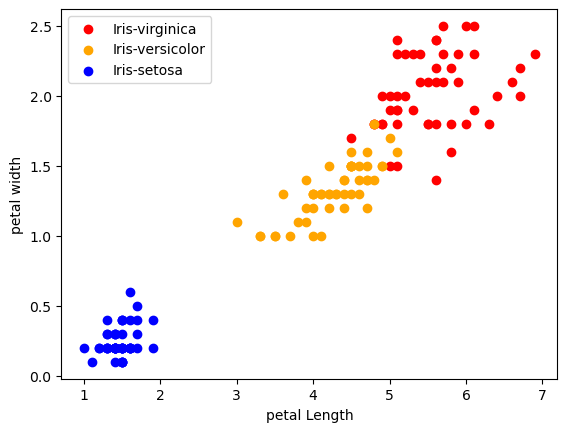

In [13]:
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c = colors[i],label=species[i])
plt.xlabel('petal Length')
plt.ylabel('petal width')
plt.legend()

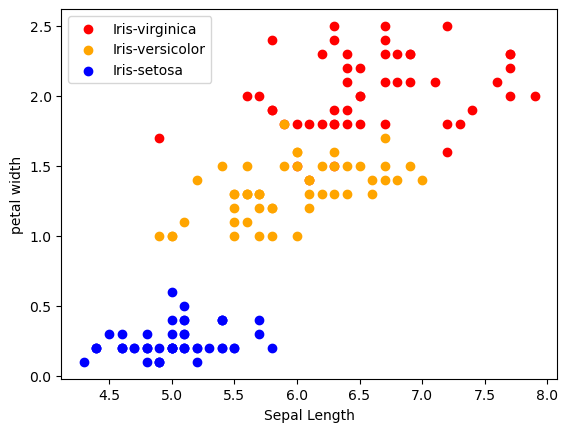

In [14]:
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_width'],c = colors[i],label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('petal width')
plt.legend()

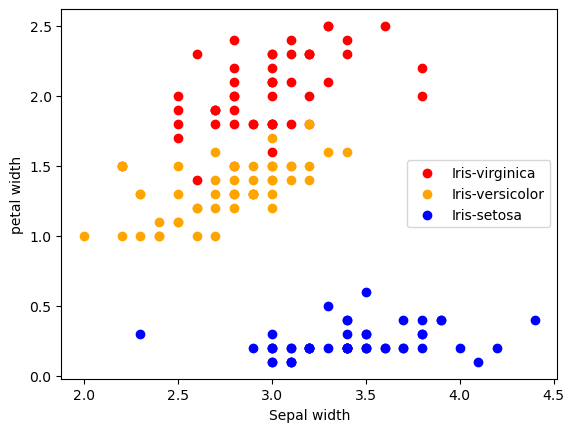

In [15]:
for i in range(3):
    x = df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c = colors[i],label=species[i])
plt.xlabel('Sepal width')
plt.ylabel('petal width')
plt.legend()

# Label Encoder
- In machine learnign, we usually deal with dataset wich contains multiple lables in one or more than one columns. These lables can be the from of words or numbers. Label Encoding refers to conerting the lables into numeric form so as to convert it into the machine-readable form

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Correlation matrix

<Axes: >

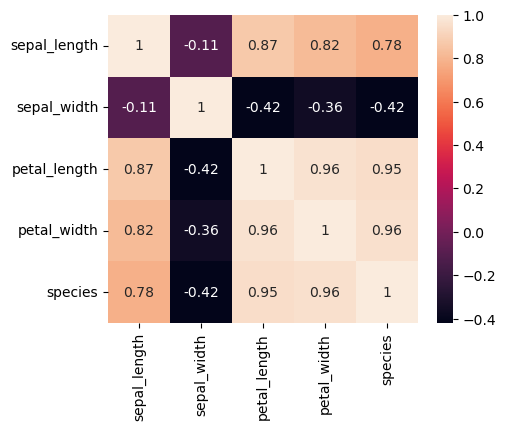

In [41]:
corr = df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax)

# Model Training

In [69]:
from sklearn.model_selection import train_test_split
#70
#30
X=df.drop(columns=['species'])
Y=df['species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [70]:
#logistic regresion
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [71]:
model.fit(x_train,y_train)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
model.score(x_test,y_test)

0.9777777777777777

In [73]:
print('Accuracy: ',model.score(x_test,y_test)*100)

Accuracy:  97.77777777777777


In [74]:
#knn 
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier()

In [75]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [76]:
KNN.score(x_test,y_test)

1.0

In [77]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [78]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [79]:
tree.score(x_test,y_test)

0.9777777777777777